In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../..')
sys.path.append( '/home/cactuskid13/miniconda3/pkgs/')
print(sys.path)

['/home/cactuskid13/pyprofiler/pyprofiler/notebooks', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python37.zip', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/lib-dynload', '', '/home/cactuskid13/.local/lib/python3.7/site-packages', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages', '/home/cactuskid13/pyham', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/IPython/extensions', '/home/cactuskid13/.ipython', '../..', '/home/cactuskid13/miniconda3/pkgs/']


In [2]:
#using the profiler. It's easy!
#lets import the profiler, configuration file and some tools for GO analysis to look at our returned results
from pyprofiler.utils import config_utils
import pyprofiler.utils.goatools_utils as goa
import pyprofiler.profiler as profiler



{'dir': {'datadir': '/home/cactuskid13/pyprofiler/pyprofiler/all/all512/', 'omadir': '/home/cactuskid13/mntpt/OMA/jun/'}, 'orthoxmltar': '', 'email': 'dmoi@unil.ch'}


In [3]:
#lets also create a go annotation enrichment study object to describe functional enrichment in our profiling results
gaf = goa.buildGAF( '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/oma-go.txt' )
study = goa.return_enrichment_study_obj( gaf , obo = '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo')

/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo: fmt(1.2) rel(2019-07-01) 47,413 GO Terms

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100% 8,270,255 of 8,270,255 population items found in association


In [4]:
#lets load a compiled db containing the OMA root HOGs into a profiler oject 
p = profiler.Profiler(lshforestpath = config_utils.datadir+ 'newlshforest.pkl' , hashes_h5=config_utils.datadir  +'hashes.h5' , mat_path= None, oma = True, tar= None , nsamples = 512)

loading lsh
indexing lsh


Cannot load SequenceSearch. Any future call to seq_search will fail!
Traceback (most recent call last):
  File "../../pyprofiler/pyoma/browser/db.py", line 879, in __init__
    self.seq_idx = self.seq_idx()
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/link.py", line 397, in __call__
    self.extfile = tables.open_file(filename, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 320, in open_file
    return File(filename, mode, title, root_uep, filters, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 784, in __init__
    self._g_new(filename, mode, **params)
  File "tables/hdf5extension.pyx", line 374, in tables.hdf5extension.File._g_new
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/utils.py", line 157, in check_file_access
    raise IOError("``%s`` does not exist" % (filena

3146
DONE


In [5]:
import pandas as pd
import numpy as np

#load the kinetochore data and map it to OMA HOGs
#these are blast results against oma since they had their own adhoc IDs

kinetodf = pd.DataFrame.from_csv('kineto_mapping.csv', header = None)
#filter by evalue
kinetodf= kinetodf[kinetodf[10]< .000001]
kinetodf['name'] = kinetodf.index.map( lambda x : x.split('_')[-1] )

def grabHog(ID):
    try:
        return p.db_obj.entry_by_entry_nr(p.db_obj.id_resolver.resolve(ID))[4].decode()
    except:
        return np.nan
#map to OMA HOGs
kinetodf['HOG'] = kinetodf[1].map(grabHog)
print(kinetodf.head())

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys


                                              1        2     3   4  5  6  \
0                                                                          
Homo_sapiens_HSAP017770_ANAPC1_Apc1  HUMAN17502  100.000  1944   0  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PANTR28459   99.743  1944   5  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  CHLSB04039   99.383  1944  12  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PAPAN05104   99.331  1944  13  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PANTR28460   99.126  1945  14  2  1   

                                        7  8     9   10      11  name  \
0                                                                       
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4029.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4017.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4007.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4007.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC

In [6]:
kinetodf = kinetodf.dropna(subset=['HOG'] , axis=0)
print(kinetodf)

                                                1        2     3    4   5  \
0                                                                           
Homo_sapiens_HSAP017770_ANAPC1_Apc1    HUMAN17502  100.000  1944    0   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PANTR28459   99.743  1944    5   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CHLSB04039   99.383  1944   12   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PAPAN05104   99.331  1944   13   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PANTR28460   99.126  1945   14   2   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CALJA06361   98.405  1944   30   1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PANTR28461   97.892  1945   20   3   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    FELCA03737   97.274  1944   53   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    HORSE05873   97.171  1944   55   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    MUSPF05472   97.274  1944   53   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    RABIT08361   96.914  1944   60   0   

In [7]:
#lets search for interactors of each HOG in our dataset and map them back to the dataframe
from pyprofiler.utils.hashutils import hogid2fam
#print(kinetodf)
print(len(kinetodf.HOG.unique()))
print(len(kinetodf.name.unique()))
kinetodf['topHOG'] = kinetodf.HOG.map(lambda x : str(x).split('.')[0])
Hogs = []

#lets just grab the top one closest to the human sequence with a HOG ID
for n in kinetodf.name.unique():
    sub = kinetodf[kinetodf.name == n ]
    for Hog in list(sub.topHOG.unique())[0:3]:
        if len(Hog)>0:
            Hogs.append(Hog)
print(Hogs)
print(len(set(Hogs)))

4201
91
['HOG:0397431', 'HOG:0409203', 'HOG:0217889', 'HOG:0373006', 'HOG:0354438', 'HOG:0394532', 'HOG:0371013', 'HOG:0420946', 'HOG:0420607', 'HOG:0366264', 'HOG:0603663', 'HOG:0354613', 'HOG:0383489', 'HOG:0363570', 'HOG:0379370', 'HOG:0218415', 'HOG:0252529', 'HOG:0372963', 'HOG:0365955', 'HOG:0260009', 'HOG:0214005', 'HOG:0375966', 'HOG:0327049', 'HOG:0390011', 'HOG:0340198', 'HOG:0365745', 'HOG:0362181', 'HOG:0392167', 'HOG:0389803', 'HOG:0403265', 'HOG:0358495', 'HOG:0353946', 'HOG:0381237', 'HOG:0413144', 'HOG:0364121', 'HOG:0366348', 'HOG:0359514', 'HOG:0217941', 'HOG:0406831', 'HOG:0347716', 'HOG:0362214', 'HOG:0357309', 'HOG:0403075', 'HOG:0612245', 'HOG:0408225', 'HOG:0355083', 'HOG:0218352', 'HOG:0369639', 'HOG:0395896', 'HOG:0398721', 'HOG:0407058', 'HOG:0422600', 'HOG:0366005', 'HOG:0363823', 'HOG:0344375', 'HOG:0408899', 'HOG:0335704', 'HOG:0368108', 'HOG:0609097', 'HOG:0400677', 'HOG:0358847', 'HOG:0218447', 'HOG:0219166', 'HOG:0218368', 'HOG:0257629', 'HOG:0216232', '

In [8]:
#now we can make a second dataframe with the hash signatures of each of our queries
#reading the hdf5 and grabbing all the hash signatures may take a moment
profiles = p.pull_hashes( set(Hogs) )
names = dict( zip( kinetodf.HOG , kinetodf.name) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  }  for h in profiles if h in names}
profiles = pd.DataFrame.from_dict( profiles , orient='index' )
print(profiles.head())
print(len(profiles))
print(len(profiles.name.unique()))
profiles = profiles.drop_duplicates( subset = 'name', keep = 'last')
print(len(profiles))
print(profiles)

                                                       hashsig   name
HOG:0214005  <datasketch.weighted_minhash.WeightedMinHash o...   Dad4
HOG:0216232  <datasketch.weighted_minhash.WeightedMinHash o...   Dad3
HOG:0217836  <datasketch.weighted_minhash.WeightedMinHash o...   Hsk3
HOG:0217853  <datasketch.weighted_minhash.WeightedMinHash o...  Spc19
HOG:0217889  <datasketch.weighted_minhash.WeightedMinHash o...   Duo1
125
80
80
                                                       hashsig      name
HOG:0217836  <datasketch.weighted_minhash.WeightedMinHash o...      Hsk3
HOG:0217853  <datasketch.weighted_minhash.WeightedMinHash o...     Spc19
HOG:0217889  <datasketch.weighted_minhash.WeightedMinHash o...      Duo1
HOG:0217941  <datasketch.weighted_minhash.WeightedMinHash o...     Ndc10
HOG:0218162  <datasketch.weighted_minhash.WeightedMinHash o...     Ctf13
HOG:0218352  <datasketch.weighted_minhash.WeightedMinHash o...      Apc9
HOG:0218715  <datasketch.weighted_minhash.WeightedMinHash o

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
import colour
#we can perform an all vs all comparison to replicate the results in va hoof et al
import time 
import multiprocessing as mp

pool = mp.Pool()


print(len(list(profiles.hashsig)) )
start = time.time()
print( list( profiles.hashsig )[0].jaccard(list(profiles.hashsig)[1]) )       
print(time.time()-start)

jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(list(profiles.hashsig)) ] for i,h1 in enumerate(list(profiles.hashsig))]

pool.close()

jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal( jkern , 1 )
print(jkern)
g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) )


colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
red = colour.Color('red')
blue = colour.Color('blue')
colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
colordict = { n:colors[colordict[n]] for n in colordict}
red = colour.Color('red')
blue = colour.Color('blue')
                                
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

for tick_label in g.ax_heatmap.axes.get_xticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

    
plt.show()

80
0.19921875
0.0026390552520751953
[[1.         0.19921875 0.85742188 ... 0.         0.         0.        ]
 [0.19921875 1.         0.20117188 ... 0.         0.         0.        ]
 [0.85742188 0.20117188 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.33007812 0.21484375]
 [0.         0.         0.         ... 0.33007812 1.         0.125     ]
 [0.         0.         0.         ... 0.21484375 0.125      1.        ]]


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


<Figure size 2000x2000 with 4 Axes>

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


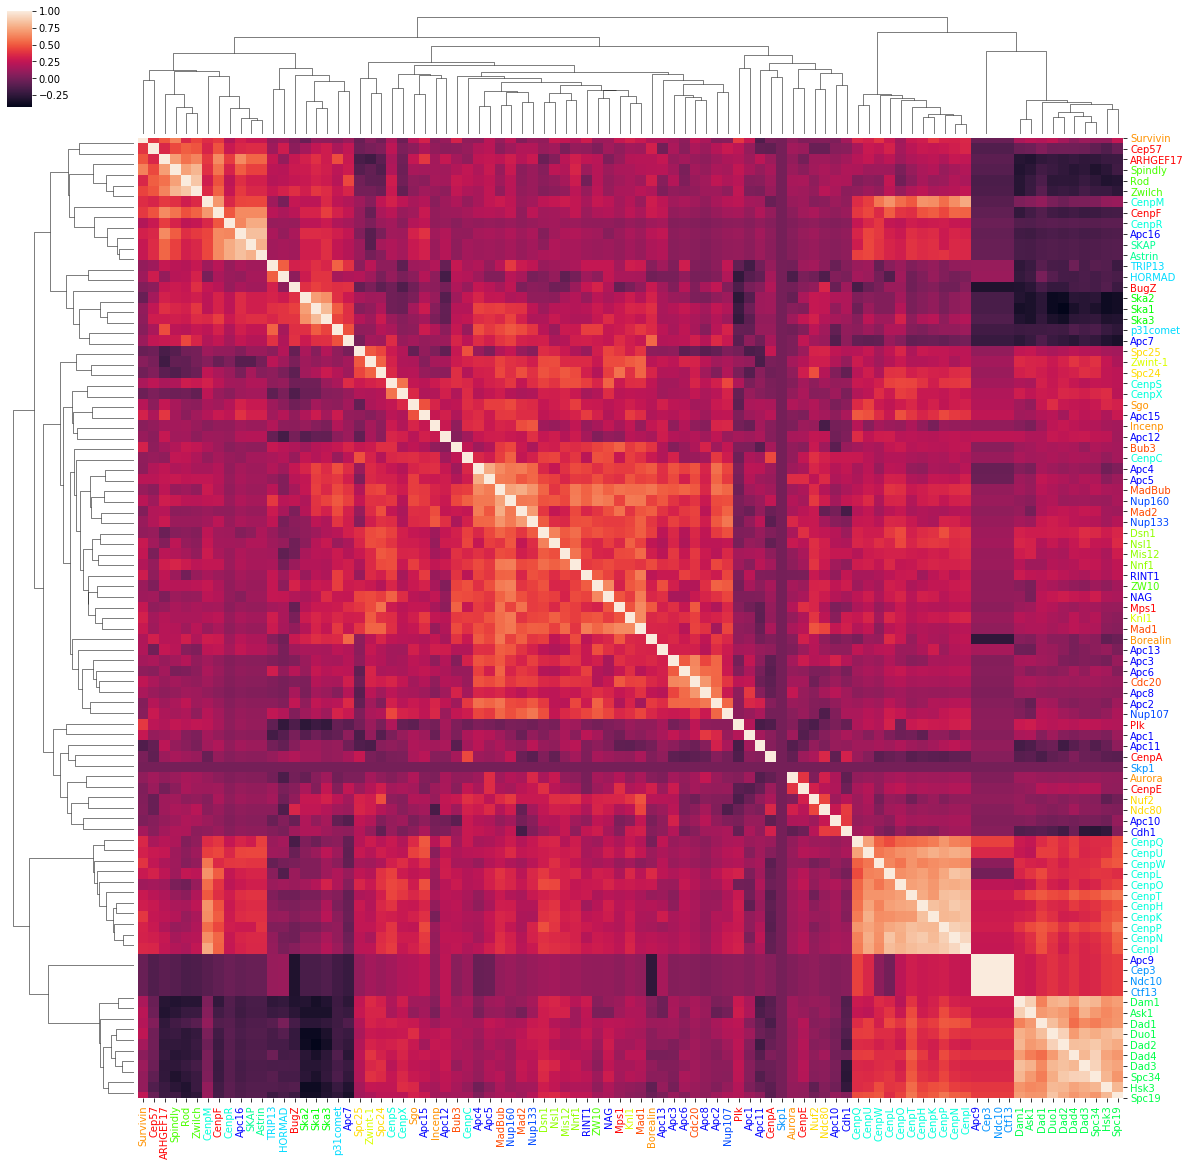

In [10]:
#lets load the original pearson correlation data and compare to our jaccard similarity metric
pearsondf = pd.DataFrame.from_csv('./kinetocore_pearson.csv')

g = sns.clustermap( pearsondf , xticklabels= pearsondf.index , yticklabels= pearsondf.index , figsize = (20,20) )

colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
red = colour.Color('red')
blue = colour.Color('blue')
colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
colordict = { n:colors[colordict[n]] for n in colordict}
red = colour.Color('red')
blue = colour.Color('blue')
                                
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

for tick_label in g.ax_heatmap.axes.get_xticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)
   


plt.show()


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


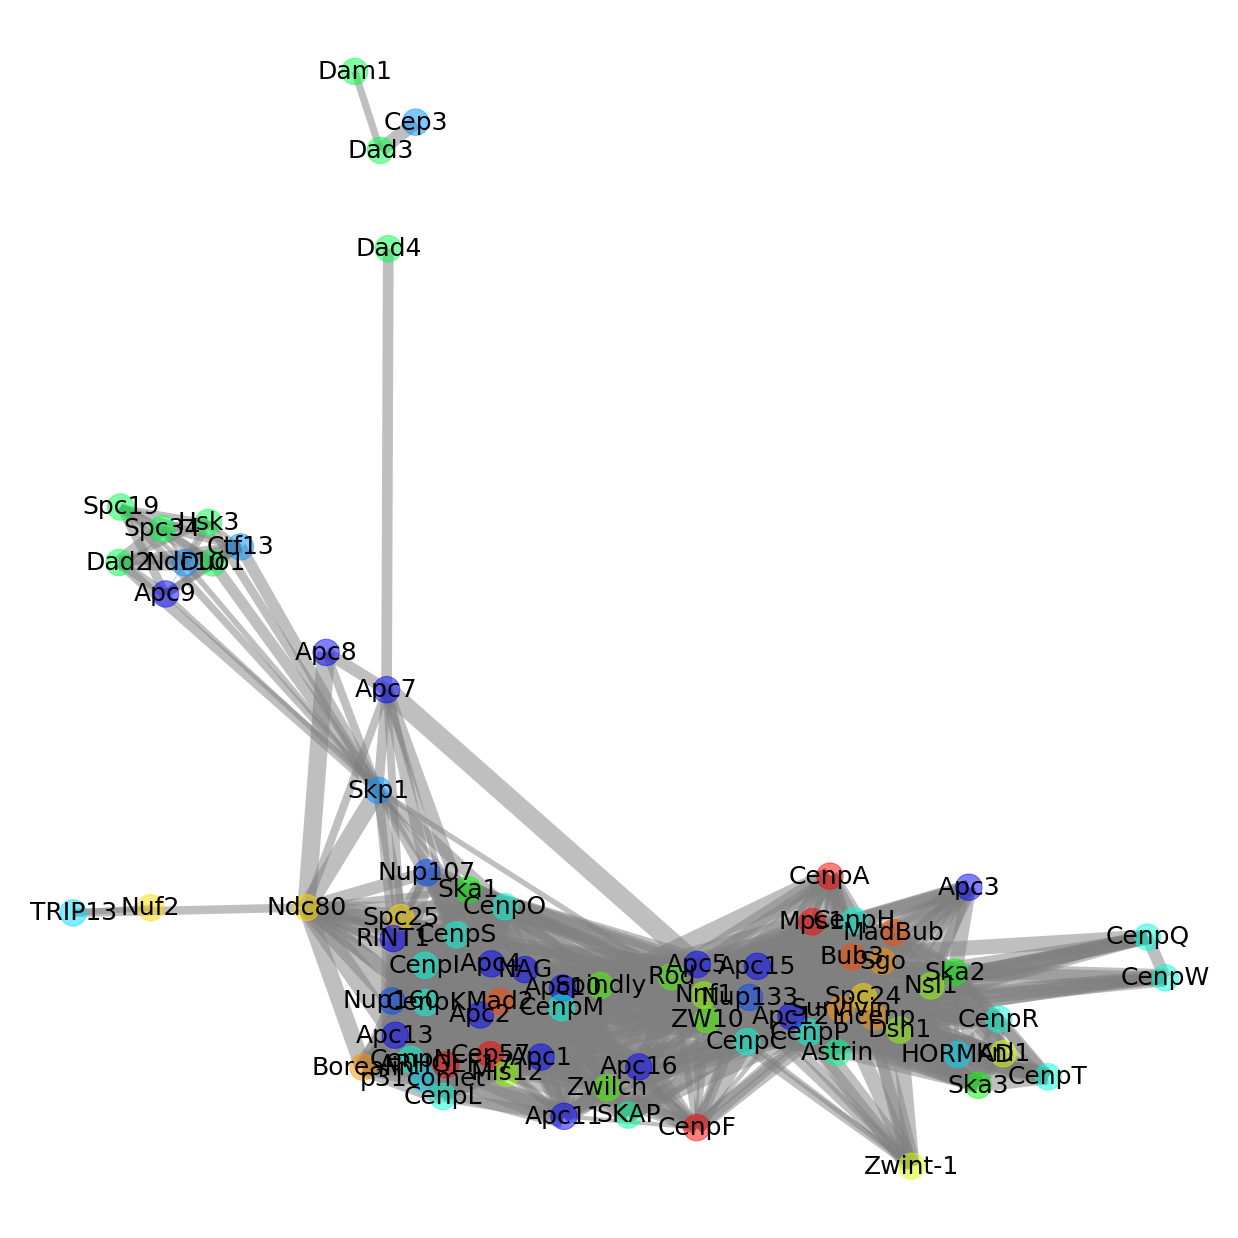

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


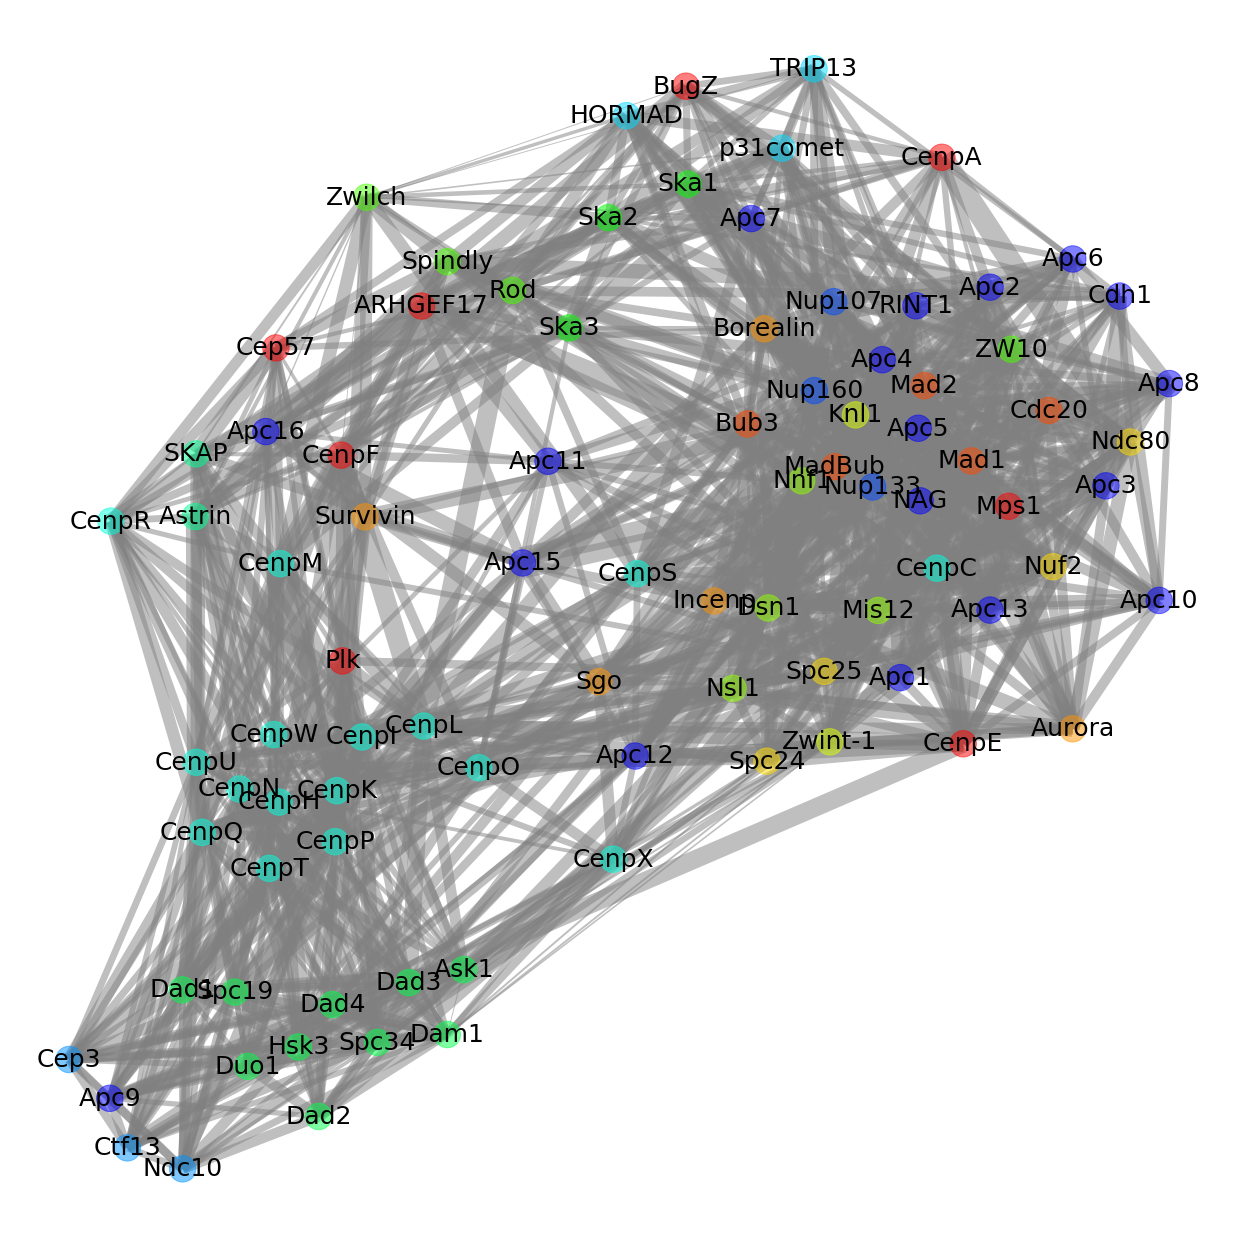

In [15]:
#lets compare the organisation of the complex in both as graph structures
import networkx as nx
pG = nx.from_numpy_matrix( pearsondf.to_numpy() )
jG = nx.from_numpy_matrix( jkern )
pG = nx.relabel_nodes( pG , { i:p for i,p in enumerate(pearsondf.index) })
jG = nx.relabel_nodes( jG , { i:p for i,p in enumerate(profiles.name) })
print(pG)
print(jG)
alledges={}
shared={}
topk = 20

for g in [jG, pG]:
    finalg = nx.Graph()
    for n in g.nodes():
        alledges = [ (n,l) for l in g.neighbors(n) if n != l ]
        weights = [ g[e[0]][e[1]]['weight'] for e in alledges]
        keep = np.flip(np.argsort(weights))[0:topk]
        edges = [ alledges[s] for s in list(keep) ]
        [  finalg.add_edge(e[0],e[1], weight= max(1/(i +1),g[e[0]][e[1]]['weight']) ) if finalg.has_edge(e[0],e[1]) else finalg.add_edge(e[0],e[1], weight= g[e[0]][e[1]]['weight']) for i,e in enumerate(edges)   ]
    pos = nx.spring_layout( finalg , weight='weight')
    weights = np.asarray([e[2]['weight'] for e in g.edges(data = True)])
    plt.figure( figsize = (17,17))
    cvec = [ colordict[n] if n in colordict else 'black' for n in finalg.nodes()]
    nx.draw(finalg, pos=pos, edge_color='grey', width= 5*np.log( weights ), node_size= 700, node_color = cvec ,alpha = .5 ) 
    labels=nx.draw_networkx_labels(finalg , pos = pos , font_size= 25 )
    plt.show()


In [11]:
from scipy.stats import pearsonr , spearmanr , brunnermunzel
pearsondf = pearsondf[profiles.name]
pearsondf = pearsondf.loc[profiles.name]
pearsonmat = pearsondf.to_numpy()
print(pearsonmat.shape)

print(jkern.shape)
print('spearman')
print( spearmanr( pearsonmat.ravel(), jkern.ravel() ))
print( 'pearson')
print( pearsonr( pearsonmat.ravel(), jkern.ravel() ))
print('permutation')
print( brunnermunzel( pearsonmat.ravel(), jkern.ravel() ))

(80, 80)
(80, 80)
spearman
SpearmanrResult(correlation=0.20530904915708614, pvalue=7.129502802451221e-62)
pearson
(0.39947864491730256, 7.172946549216448e-244)
permutation
BrunnerMunzelResult(statistic=-66.72381460010135, pvalue=0.0)


In [12]:
#now we can add in the HOGs we found in our search
#the clustering shows a similar structure

#lets query the the lsh with each HOG
res = { h: p.hog_query(hog_id= str(h), k = 10 ) for h in Hogs if len(h)>0 }
profiles = p.pull_hashes( set(res.keys()).union( set( [ h for results in res.values() for h in results ] ) ) )

names = dict( zip( kinetodf.HOG , kinetodf.name) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  } if h in names else {'hashsig': profiles[h] , 'name': ''  }   for h in profiles }
profiles = pd.DataFrame.from_dict( profiles , orient='index' )

print(profiles.head())
print(len(profiles))

                                                  hashsig name
213873  <datasketch.weighted_minhash.WeightedMinHash o...     
213887  <datasketch.weighted_minhash.WeightedMinHash o...     
213915  <datasketch.weighted_minhash.WeightedMinHash o...     
213929  <datasketch.weighted_minhash.WeightedMinHash o...     
213964  <datasketch.weighted_minhash.WeightedMinHash o...     
1775


In [ ]:
#lets perform and enrichment on each cluster to see if we were able to pull down some functional modules
#some of these results may be unknown kinetochore proteins under an open world assumption

jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(list(profiles.hashsig) ) ] for i,h1 in enumerate(list( profiles.hashsig ) ) ]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal( jkern , 1 )



In [ ]:
import scipy

cutoff = 1.3
z = scipy.cluster.hierarchy.linkage(jkern, method='average', metric='euclidean')
clusters = scipy.cluster.hierarchy.fcluster(z, t=cutoff, criterion='distance')
colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
colordict2 = dict( zip( list(set(clusters)) , list(colors)))
rowcolors = [ colordict2[c] for c in clusters]

print(np.unique(clusters).shape )

g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) )
colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
red = colour.Color('red')
blue = colour.Color('blue')
colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
colordict = { n:colors[colordict[n]] for n in colordict}
red = colour.Color('red')
blue = colour.Color('blue')
                           

g.ax_row_dendrogram.axvline(cutoff)
g.ax_col_dendrogram.axhline(cutoff)

for tick_label in g.ax_heatmap.axes.get_yticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

for tick_label in g.ax_heatmap.axes.get_xticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)   
plt.show()



SyntaxError: unexpected EOF while parsing (<ipython-input-25-fc90ef1804f7>, line 1)

In [41]:
#we can enrich for functionality in each cluster
goares = {}

for c in np.unique(clusters):
    sub = profiles.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if len(sub.name.unique()) >1 : 
        print(sub.name.unique())
        queries  = set(sub[ sub.index.map(lambda x : 'HOG' in x )].index )
        #remove the query from search results
        searchfams = [str(hogid2fam(h)) for h in queries ]
        searchres = sub[ sub.index.map(lambda x : 'HOG' not in x )]
        searchres  = searchres[~searchres.index.isin(searchfams)]
        #run a go enrichment study on the cluster
        goares[c] = goa.run_GOEA_onresults( searchres.index.map( hogid2fam ) , p.db_obj, study)
        namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ][0:5])
        #output the results
        goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.1]
        study.wr_txt(namestr + "_v3_kinetocluster_enrich.txt", goea_results_sig)
        print(len(goea_results_sig))

['' 'Nup133' 'Apc1' 'NAG' 'Apc4' 'Apc13' 'ZW10' 'Spindly' 'CenpS' 'Rod'
 'Spc25']
compiling hogs
0
10
20
30
40
50
60
70
80
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 16142 IDs ...
100% 14,254 of 14,254 study items found in association
 88% 14,254 of 16,142 study items found in population(8270255)
Calculating 27,275 uncorrected p-values using fisher_scipy_stats
  27,275 GO terms are associated with 8,270,213 of 8,270,255 population items
   2,524 GO terms are associated with 14,254 of 16,142 study items
  METHOD fdr_bh:
   3,075 GO terms found significant (< 0.15=alpha) (1957 enriched + 1118 purified): statsmodels fdr_bh
  13,946 study items associated with significant GO IDs (enriched)
   6,125 study items associated with significant GO IDs (purified)
done
DONE!
   2986 GOEA results for 14246 study items. WROTE: Nup133_Apc1_NAG_Apc4_Apc13__v3_kinetocluster_enrich.txt
2986
['' 'CenpP' 'SKAP' 'CenpC' 'Zwint-1' 'CenpQ' 'CenpW' 'CenpA' 'CenpT'
 

In [38]:
def donuts_GO( filename , allprots ):
    #this function will read the GO enrichment output and show the proportion of each HOGs annotation for the top 5 GO terms
    #as well as the proportion of each of the top 5 GO terms contributed by each HOG
    #If the HOGs share GO annotations and coevolved but contain non homologous sequences, they are probably involved in the same network
    with open( filename , 'r') as filein:
        vals = np.zeros( (5,40))
        GOterms = []
        pvals = []
        depths = []
        for i,line in enumerate(filein):
            words = line.split(',')
            if i < 5:
                prots = words[1:]
                prots += words[0].split()[-1]
                GOterms.append(words[0].split()[0])
                description= ''.join( [ word + ' ' for word in words[0].split()[0:-1] ] )
                print(description)
                for prot in prots:
                    try:
                        counts[allprots[prot.strip()]]+=1
                    except:
                        pass
                for col,hog in enumerate(counts):
                    vals[i,col] = counts[hog]
            if int(words[0].split()[3].split('/')[0])>0 and float(words[0].split()[2]) <1:
                pvals.append(float(words[0].split()[2]))
        fig, ax = plt.subplots()
        size = 0.3
        cmap = plt.get_cmap("tab20c")
        outer_colors = cmap(np.arange(len(GOterms))*4)
        inner_colors = cmap(np.array([1, 2, 5, 6, 9]))

        ax.pie(vals.sum(axis=1),  labels=GOterms ,radius=1, colors=outer_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.set(aspect="equal", title= 'query w/ '+ hog)

        #### do the inverse
        fig, ax = plt.subplots()
        size = 0.3
        cmap = plt.get_cmap("tab20c")
        inner_colors = cmap(np.arange(len(GOterms))*4)
        outer_colors = cmap(np.array([1, 2, 5, 6, 9]))
        labels = [ c  if counts[c]>50 else ''  for c in counts.keys() ]
        ax.pie(vals.sum(axis=0),  labels=list(counts.keys()) ,radius=1, colors=outer_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.pie(vals.T.flatten(), radius=1-size, colors=inner_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.set(aspect="equal", title= 'query w/ '+ hog)
        plt.show()
        fig, ax = plt.subplots()
        size = 0.3
        ax.hist( np.log(1-np.asarray(pvals)), bins = 10)
        ax.set( title= 'pvals for query w/ '+ hog)
        plt.show()

In [39]:
#now lets look at a completely unknown network: sexual reproduction
#lets star with 3 queries of known proteins


In [40]:
#search Hap2 SPo11 Gex1
#mapping Hap2's uniprot ID to its OMA entry and querying with the OMA HOG
#we can use a pretty broad search to get the 200 closest profiles since we're only considering one HOG at a time
hap2= p.db_obj.id_resolver.resolve('f4jp36')
entry = p.db_obj.entry_by_entry_nr(hap2)
print(entry)
hap2hogs = p.hog_query(hog_id= str(entry[4]) ,  k=50)

#same for gex1
gex1= p.db_obj.id_resolver.resolve('A0A1P8B9F7')
entry = p.db_obj.entry_by_entry_nr(gex1)
print(entry)
gexhogs = p.hog_query(hog_id= str(entry[4]) , k=50)

#and spo11
spo11= p.db_obj.id_resolver.resolve('Q9M4A2')
entry = p.db_obj.entry_by_entry_nr(spo11)
print(entry)
spohogs = p.hog_query(hog_id= str(entry[4]) , k=50 )

(12814393, 4963293168, 706, 699441, b'HOG:0418184.3a.11b', b'4', 7063291, 7066784, 1, 0, b'HAP2_ARATH', 14902693896, 2119, b'64dcfddd880e7d4265a77286668f7be9', 635212475, 25, b'', -1, -1)
(12826588, 4968565994, 516, 497778, b'HOG:0431147.3a', b'5', 22479153, 22481071, -1, 12826588, b'A0A1P8B9F7', 14918524569, 1549, b'c9c8e5d3b55063acdc397a5f1cd18710', 635517383, 25, b'', -1, -1)
(12806927, 4960172924, 363, 857342, b'HOG:0625797.6c.12b', b'3', 4231560, 4234192, -1, 12806927, b'SPO11_ARATH', 14893325698, 1090, b'620e28803b4c72fae834a355cd77b6f3', 635025820, 25, b'', -1, -1)


In [ ]:
#reading in the sequence identifiers for all HOGs pulled down in a search from the HDF5 can take some time
goares = {}
searches = {'hap':hap2hogs, 'gex':gexhogs, 'spo':spohogs}
for res in searches:
    goares[res] = goa.run_GOEA_onresults( searches[res], p.db_obj, study)

compiling hogs
0
10
20
30
40
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 4212 IDs ...
100%  2,713 of  2,713 study items found in association
 64%  2,713 of  4,212 study items found in population(8270255)
Calculating 27,275 uncorrected p-values using fisher_scipy_stats
  27,275 GO terms are associated with 8,270,213 of 8,270,255 population items
     483 GO terms are associated with  2,713 of  4,212 study items
  METHOD fdr_bh:
     361 GO terms found significant (< 0.15=alpha) (154 enriched + 207 purified): statsmodels fdr_bh
   2,431 study items associated with significant GO IDs (enriched)
   1,087 study items associated with significant GO IDs (purified)
done
DONE!
compiling hogs
0
10
20
30
40
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 4853 IDs ...
100%  3,421 of  3,421 study items found in association
 70%  3,421 of  4,853 study items found in population(8270255)
Calculating 27,275 uncorrected 

In [ ]:
for res in goares:
    goea_results_sig = [r for r in goares[res][0] if r.p_fdr_bh < 0.05]
    study.wr_txt(res + "v2enrich.txt", goea_results_sig)
    print(len(goea_results_sig))

In [55]:
#And now let's try the same thing with a bigger list of candidate genes
#load reproduction pathway hogs. These were downloaded from the SGD database as tsv files by selecting salient go terms. I added a few non yeast entries manually
hogdf = pd.DataFrame.from_csv('./repro_hogs.csv')
hogdf['HOG'] = hogdf['1'].map( grabHog )
hogdf = hogdf[ ~hogdf.HOG.isna() ]
hashes = p.pull_hashes( [h for h in hogdf.HOG if len(h)>0] )
hogdf['hashsig'] = hogdf.HOG.map(hashes)
hogdf = hogdf[ ~hogdf.hashsig.isnull() ]
hogdf = hogdf.drop_duplicates('3')

names = dict(zip( hogdf.HOG, hogdf['3']))
print(hogdf.head())

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


              0        1              2     3  \
0.0  S000001692  YKL209C  S. cerevisiae  STE6   
1.0  S000002248  YDL090C  S. cerevisiae  RAM1   
2.0  S000006326  YPR122W  S. cerevisiae  AXL1   
0.0  S000000951  YER149C  S. cerevisiae  PEA2   
1.0  S000003944  YLL021W  S. cerevisiae  SPA2   

                                       4  \
0.0                              STErile   
1.0  RAS protein and A-factor Maturation   
2.0                        AXiaL budding   
0.0                  PEAnut shmoo mutant   
1.0                 Spindle Pole Antigen   

                                          path      OMAID             HOG  \
0.0  ./yeastmating/results_signal_strength.tsv  6844990.0     HOG:0259166   
1.0  ./yeastmating/results_signal_strength.tsv  6842368.0  HOG:0405589.7a   
2.0  ./yeastmating/results_signal_strength.tsv  6847757.0     HOG:0219055   
0.0       ./yeastmating/results_polarisome.tsv  6843538.0     HOG:0217913   
1.0       ./yeastmating/results_polarisome.tsv  6845359

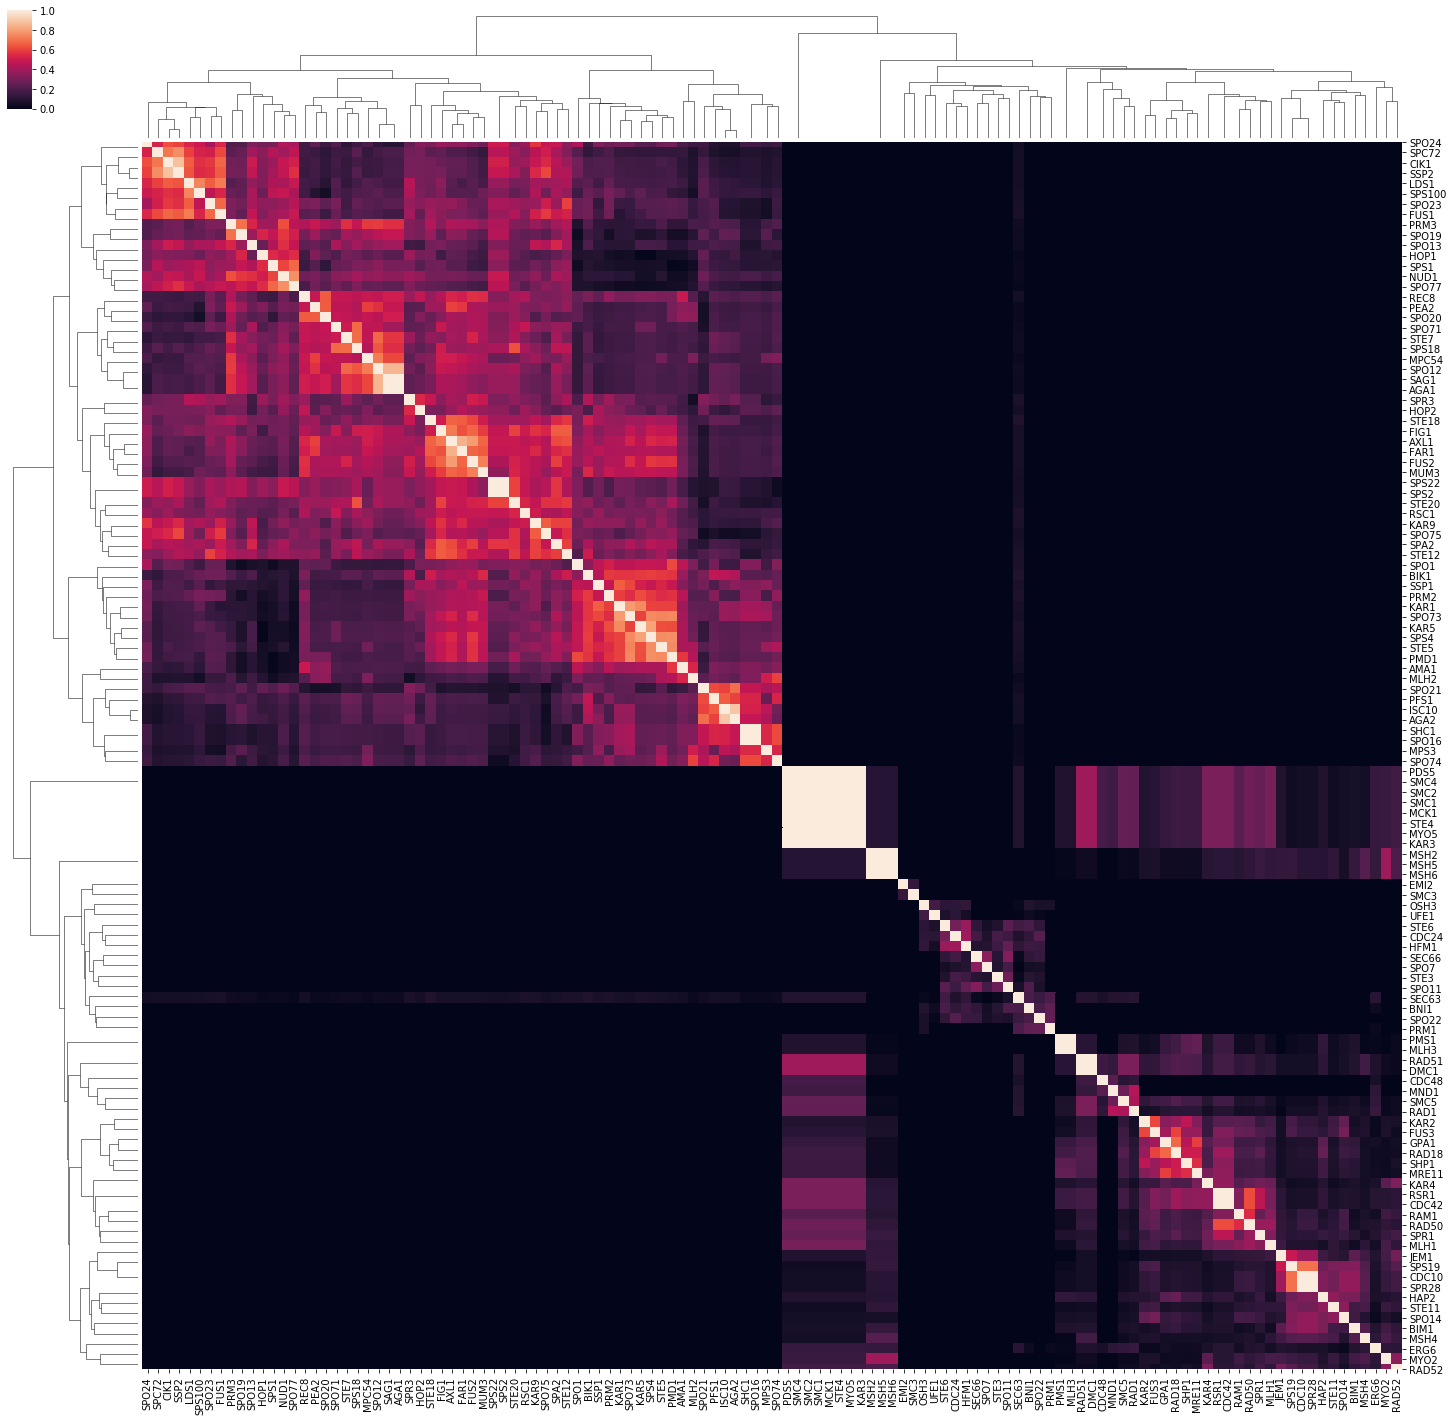

In [56]:
#lets take a look at the clustering of our queries to see if some are coevolving and we can already notice some organisation
jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(hogdf.hashsig) ] for i,h1 in enumerate(hogdf.hashsig)]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal(jkern , 1 )
g = sns.clustermap( jkern , xticklabels= hogdf['3'] , yticklabels= hogdf['3'] , figsize = (25,25) )

In [57]:
#now lets fill in our network with some putative interactors
res = { h: p.hog_query( hog_id=str(h) , k = 20 ) for h in hogdf.HOG}
Hogs = [ h for results in res.values() for h in results ] + list(res.keys())

In [58]:
profiles = profiles = p.pull_hashes( set(Hogs) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  } if h in names else {'hashsig': profiles[h] , 'name': ''  }   for h in profiles }
profiles = pd.DataFrame.from_dict( profiles , orient='index' )

print(profiles.name.unique())
print(len(profiles.name.unique()))

print(len(profiles))


['' 'SPO21' 'SPO12' 'PFS1' 'SPO13' 'SPO74' 'SPO19' 'SHC1' 'SPO77' 'PRM3'
 'SPO20' 'SPS18' 'STE7' 'SPO71' 'AGA2' 'PEA2' 'SPS1' 'ISC10' 'MPS3'
 'SPO16' 'NUD1' 'AGA1' 'SAG1' 'MLH2' 'MPC54' 'HOP1' 'SSP1' 'SPS100' 'KAR9'
 'SPO1' 'SPO23' 'SSP2' 'CIK1' 'REC8' 'STE12' 'SPO24' 'FUS1' 'FUS2' 'PRM2'
 'KAR1' 'FAR1' 'STE5' 'MUM3' 'SPC72' 'AMA1' 'SPS4' 'AXL1' 'KAR5' 'RSC1'
 'HOP2' 'STE20' 'PMD1' 'SPR3' 'SPO75' 'STE18' 'FIG1' 'BIK1' 'SPS2' 'SPS22'
 'SPO73' 'SPA2' 'LDS1' 'SPO7' 'STE3' 'SEC66' 'SPO11' 'HFM1' 'STE6' 'UFE1'
 'CDC24' 'OSH3' 'BNI1' 'PRM1' 'SPO22' 'JEM1' 'RAD50' 'FUS3' 'STE11' 'MYO2'
 'SPO14' 'MSH4' 'CDC10' 'SPR28' 'SPS19' 'RAD52' 'SPR1' 'MLH1' 'KAR2'
 'MSH6' 'MSH5' 'MSH2' 'RAM1' 'HAP2' 'MRE11' 'KAR4' 'RAD18' 'BIM1' 'SHP1'
 'GPA1' 'CDC42' 'RSR1' 'MLH3' 'PMS1' 'RAD1' 'SMC5' 'RAD51' 'DMC1' 'CDC48'
 'ERG6' 'MND1' 'SEC63' 'PDS5' 'STE4' 'SMC2' 'MCK1' 'SMC1' 'MYO5' 'SMC4'
 'KAR3' 'EMI2' 'SMC3']
121
2065


In [59]:
#lets calculate a new jaccard kernel for all of our search results and queries 
#again we can divide our results into clusters and try to see if each has a functional signature using GO enrichment
jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(profiles.hashsig) ] for i,h1 in enumerate(profiles.hashsig)]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal(jkern , 1 )



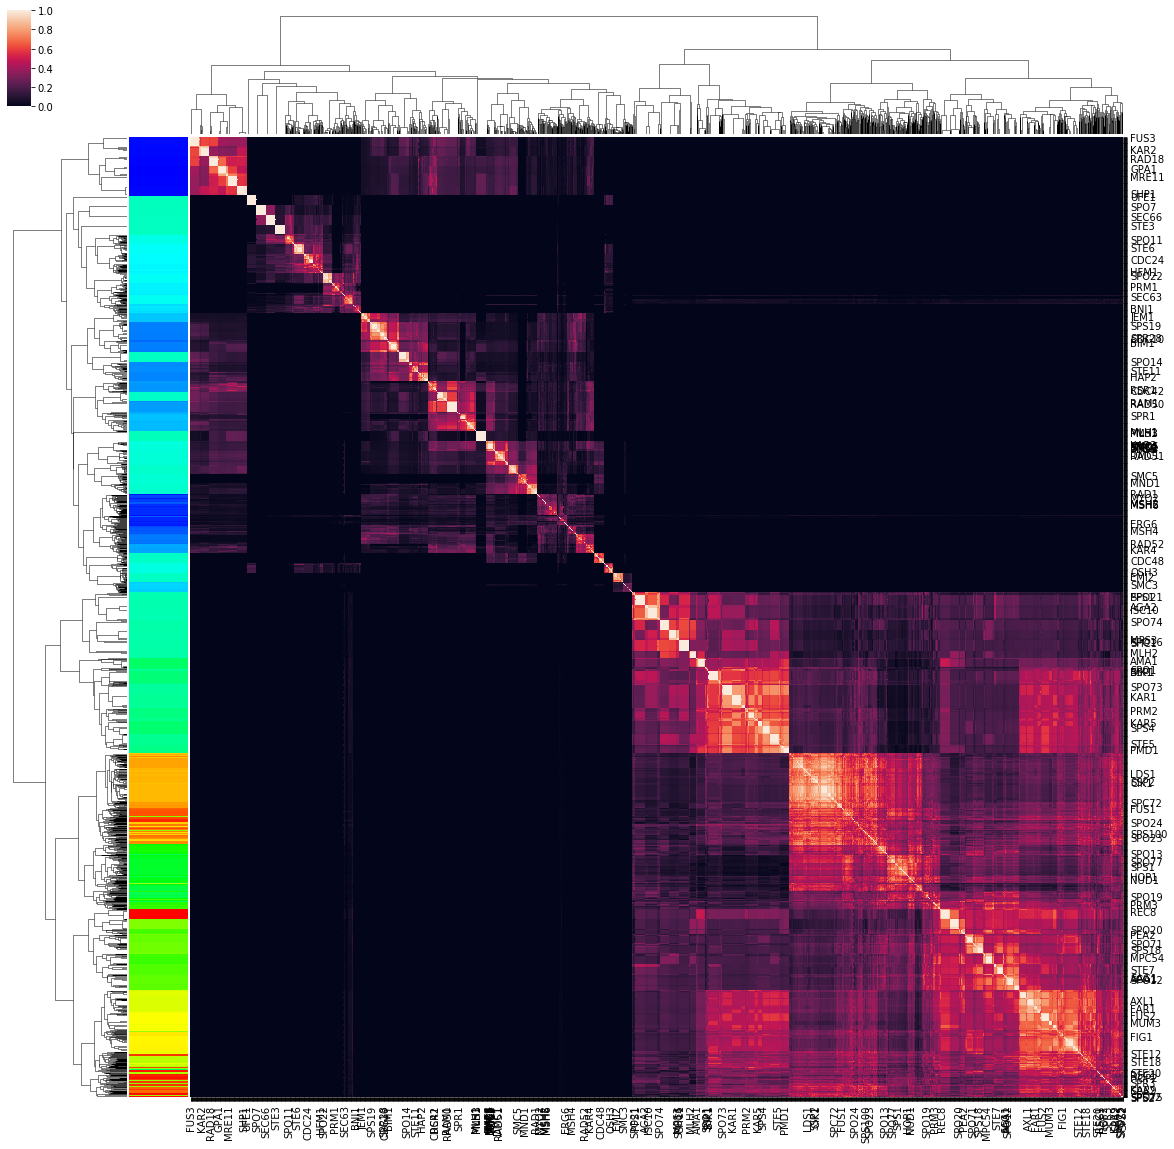

In [60]:
z = scipy.cluster.hierarchy.linkage(jkern, method='average', metric='euclidean')
clusters = scipy.cluster.hierarchy.fcluster(z, t=0.995, criterion='distance')
colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
colordict2 = dict( zip( list(set(clusters)) , list(colors)))
rowcolors = [ colordict2[c] for c in clusters]
g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) , row_colors=rowcolors )
g.ax_row_dendrogram.axvline(.995)

plt.show()

In [68]:
#and here we perform our enrichment of each cluster with a query in it
goares = {}

for c in np.unique(clusters):
    sub = profiles.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if len(sub.name.unique()) >1 : 
        print(sub.name.unique())
        
        queries  = set(sub[ sub.index.map(lambda x : 'HOG' in x )].index )
        #remove the query from search results
        searchfams = [str(hogid2fam(h)) for h in queries ]
        searchres = sub[ sub.index.map(lambda x : 'HOG' not in x )]
        searchres  = searchres[~searchres.index.isin(searchfams)]
        #run a go enrichment study on the cluster
        goares[c] = goa.run_GOEA_onresults( searchres.index.map( hogid2fam ) , p.db_obj, study)
        namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ])
        #output the results
        goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.1]
        study.wr_txt(namestr + "_reprocluster_enrich.txt", goea_results_sig)
        print(len(goea_results_sig))

['' 'REC8']
{'HOG:0218461'}
['218461']
                                                  hashsig name
218313  <datasketch.weighted_minhash.WeightedMinHash o...     
218786  <datasketch.weighted_minhash.WeightedMinHash o...     
218827  <datasketch.weighted_minhash.WeightedMinHash o...     
219333  <datasketch.weighted_minhash.WeightedMinHash o...     
219380  <datasketch.weighted_minhash.WeightedMinHash o...     
219449  <datasketch.weighted_minhash.WeightedMinHash o...     
219466  <datasketch.weighted_minhash.WeightedMinHash o...     
219492  <datasketch.weighted_minhash.WeightedMinHash o...     
220344  <datasketch.weighted_minhash.WeightedMinHash o...     
220453  <datasketch.weighted_minhash.WeightedMinHash o...     
220487  <datasketch.weighted_minhash.WeightedMinHash o...     
220592  <datasketch.weighted_minhash.WeightedMinHash o...     
220770  <datasketch.weighted_minhash.WeightedMinHash o...     
220938  <datasketch.weighted_minhash.WeightedMinHash o...     
220940  <dataske